# Feature Importance

In [148]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression, RidgeCV, LassoCV, Lasso, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)

In [58]:
df10 = pd.read_csv('model10.csv')

## Both Models

In [75]:
# best model from ML notebook for each hexagon with >=2000 children
rf = ['861e0b237ffffff', '861e0b387ffffff', '861e0b38fffffff', '861e0b397ffffff', '861e0b39fffffff', '861e0b3afffffff']
l = '861e0b2a7ffffff'

In [76]:
d=df10.loc[df10.h6==l, :]
X = d.iloc[:,5:]
y = d[['alerts']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)    
lasso = LassoLarsIC(criterion='aic', normalize=True).fit(X_train, y_train)
imp_l = abs(lasso.coef_)

In [101]:
# get feature importances for lasso model used on one hexagon
imp_l = pd.DataFrame({'feature': X.columns})

d=df10.loc[df10.h6=='861e0b237ffffff', :]
X = d.iloc[:,5:]
y = d[['alerts']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
forest = RandomForestRegressor(min_samples_split=8).fit(X_train, y_train)
imp_l[l] = forest.feature_importances_


In [95]:
# get feature importances for random forest used on other hexagons
imp_rf = pd.DataFrame({'feature': X.columns})
i=0
for h in rf:
    d=df10.loc[df10.h6==h, :]
    X = d.iloc[:,5:]
    y = d[['alerts']]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0)
    forest = RandomForestRegressor(min_samples_split=8).fit(X_train, y_train)
    imp_rf[str(h)] = forest.feature_importances_
    i+=1
    print(str(i) + '/' + str(len(rf)) + ' complete')

0/6 complete
0/6 complete
0/6 complete
0/6 complete
0/6 complete
0/6 complete


In [150]:
imp_l
importance = imp_rf.merge(imp_l, how='left', on='feature')
importance.columns = ['feature', 'hex6', 'hex2', 'hex5', 'hex1', 'hex4', 'hex3', 'hex7']
importance.head()

,feature,861e0b237ffffff,861e0b387ffffff,861e0b38fffffff,861e0b397ffffff,861e0b39fffffff,861e0b3afffffff,861e0b2a7ffffff
0,stringency,0.011629,0.002475,0.005996,0.010633,0.013279,0.013881,0.010736
1,precip,0.001347,0.000286,0.000788,0.001728,0.001229,0.002133,0.001568
2,schools,0.000000,0.077370,0.042578,0.000000,0.010443,0.000718,0.000000
3,hospitals,0.000000,0.033960,0.000059,0.000000,0.000127,0.000000,0.000000
4,stringency^2,0.009106,0.002016,0.010012,0.013499,0.008491,0.013855,0.010193


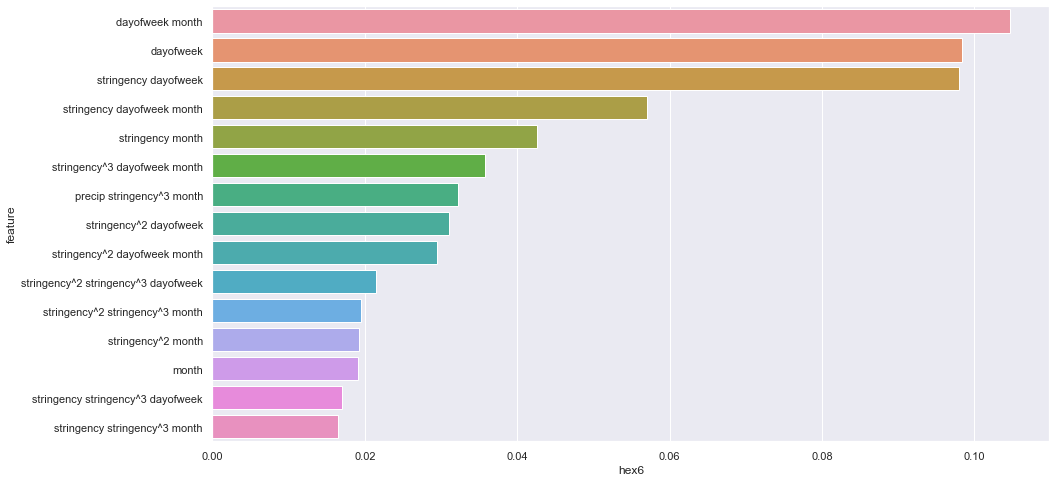

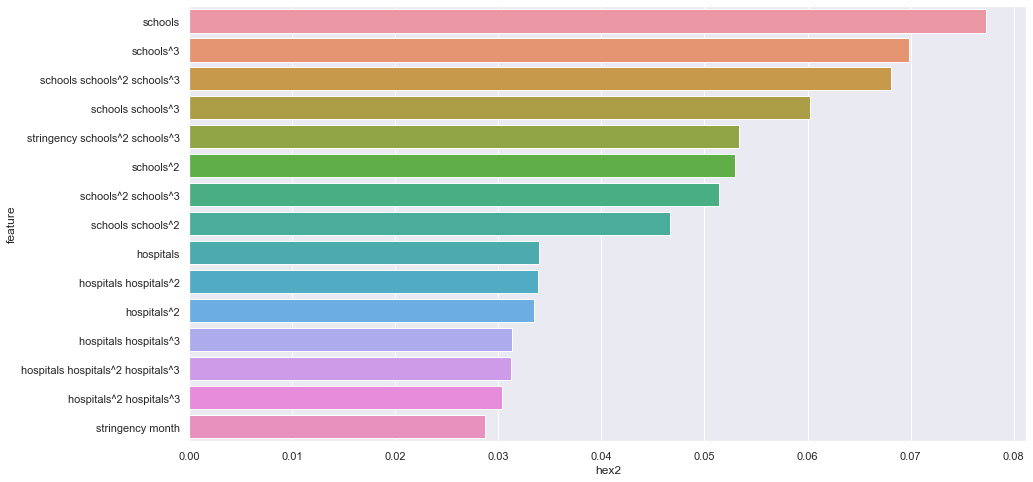

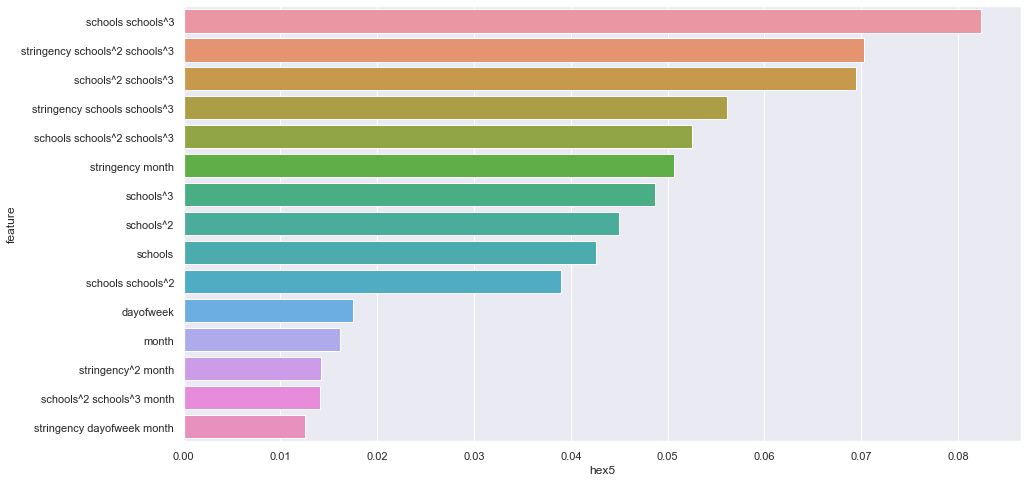

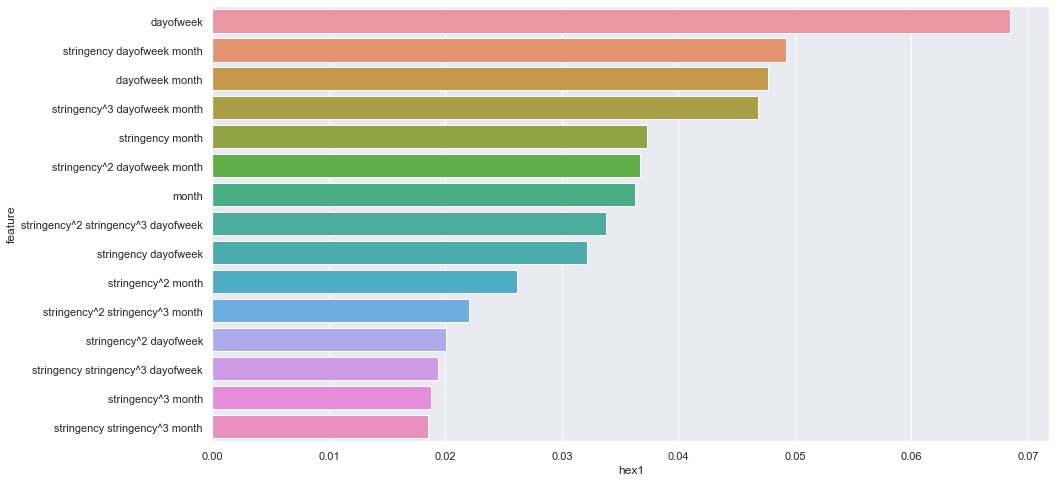

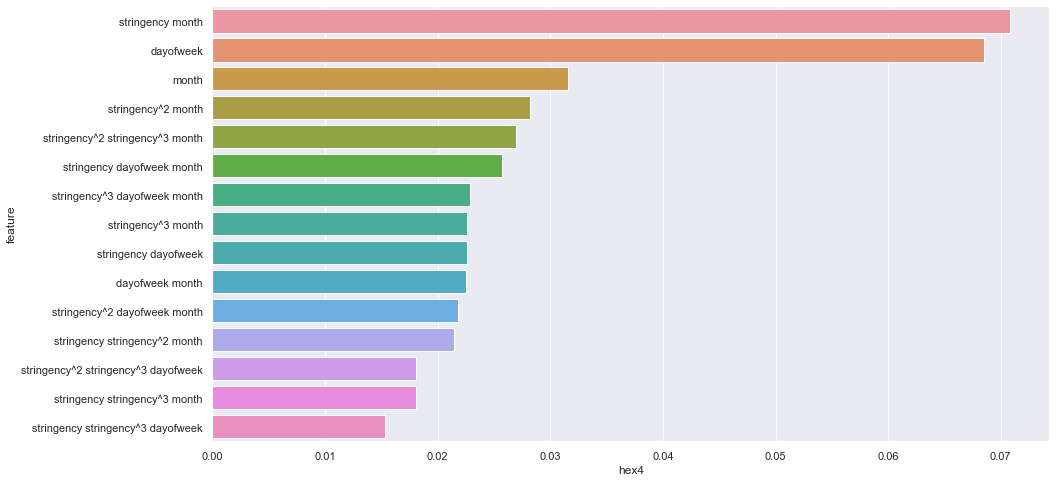

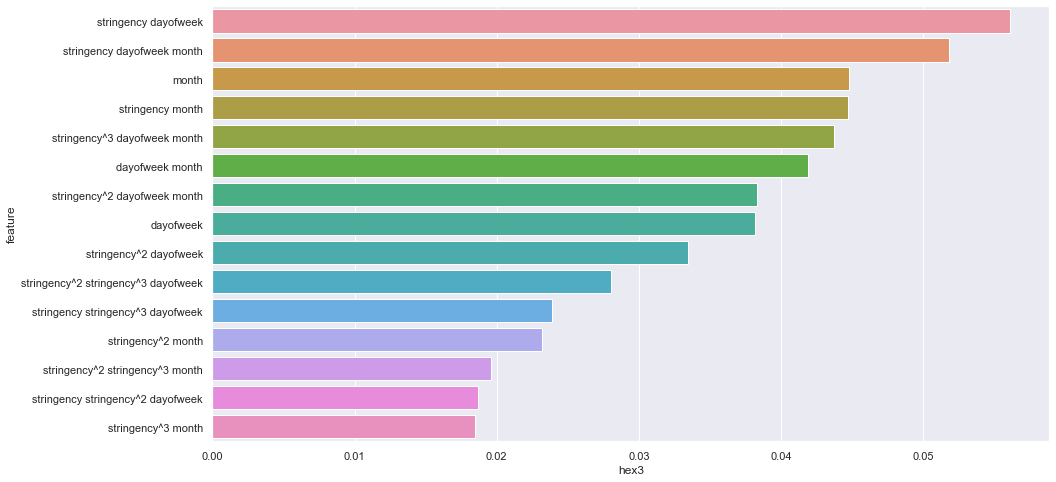

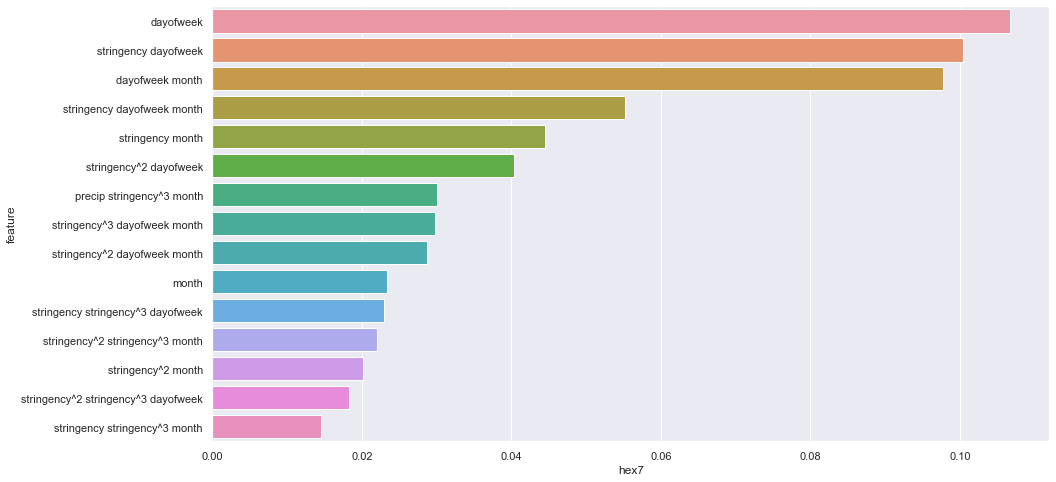

In [149]:
sns.set(rc = {'figure.figsize':(15,8)})
for h in importance.columns[1:]:
    imp = importance[['feature', h]].sort_values(by=h, ascending=False)[:15]
    plt.figure(h)
    sns.barplot(x=h, y="feature", data=imp)
    plt.savefig(h + '.png')